In [3]:
import xarray as xr
import numpy as np
import radiometry as r

In [4]:
import matplotlib.pyplot as plt

In [37]:
ds = xr.open_dataset('C:/Temp/data/filter/filter-dc-dn.nc', chunks={'filename':1})
ds = ds.swap_dims({'band':'wavelength'})
ds['tile'] = ('filename', [str(name).split('_')[-1].split('-')[0] for name in ds.filename.values])
ds['has_filter'] = ('filename', ['filter' in str(name) for name in ds.filename])
ds

<xarray.Dataset>
Dimensions:            (filename: 12, wavelength: 128, x: 520, y: 696)
Coordinates:
    band               (wavelength) int32 1 2 3 4 5 6 ... 124 125 126 127 128
  * y                  (y) float64 0.5 1.5 2.5 3.5 ... 692.5 693.5 694.5 695.5
  * x                  (x) float64 0.5 1.5 2.5 3.5 ... 516.5 517.5 518.5 519.5
  * wavelength         (wavelength) float64 372.5 377.5 ... 1.038e+03 1.044e+03
  * filename           (filename) object '_I30_L0-511_4-12-2018_11.19.46_White' ... '_I30_L0-511_4-12-2018_11.7.21_PTFE-filter'
Data variables:
    dark_corrected_dn  (filename, wavelength, y, x) uint16 dask.array<shape=(12, 128, 696, 520), chunksize=(1, 128, 696, 520)>
    tile               (filename) <U6 'White' 'White' 'Red' ... 'dark' 'PTFE'
    has_filter         (filename) bool False True False ... False False True

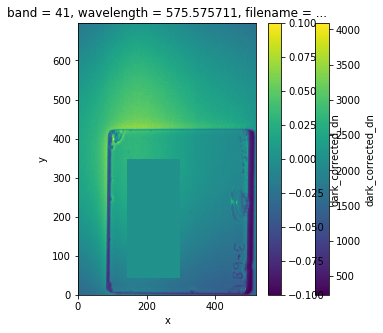

In [6]:
filter_roi = {'x': slice(150, 300, 10), 'y': slice(50, 350, 10)}
plt.figure(figsize=(5,5))
ds.isel(filename=11, wavelength=40)['dark_corrected_dn'].plot()
ds.isel(**filter_roi, filename=10, wavelength=40)['dark_corrected_dn'].plot()
plt.axis('tight')
plt.show()

In [7]:
reference = xr.Dataset(
    data_vars={'PTFE': ds.sel(filename='_I30_L0-511_4-12-2018_11.33.17_PTFE').isel(**filter_roi)['dark_corrected_dn'].drop('filename'),
              'filter': ds.sel(filename='_I30_L0-511_4-12-2018_11.7.21_PTFE-filter').isel(**filter_roi)['dark_corrected_dn'].drop('filename')
              })
reference['PTFE'] = r.PTFE_reflectance_factor_45_0().interp_like(reference.wavelength, kwargs={'fill_value':'extrapolate'}) * reference['PTFE']
reference['filter_T'] =  reference['filter'] / reference['PTFE']

In [12]:
ptfe_mean = reference['PTFE'].mean(dim=['x', 'y']).compute()
filter_mean = reference['filter'].mean(dim=['x', 'y']).compute()

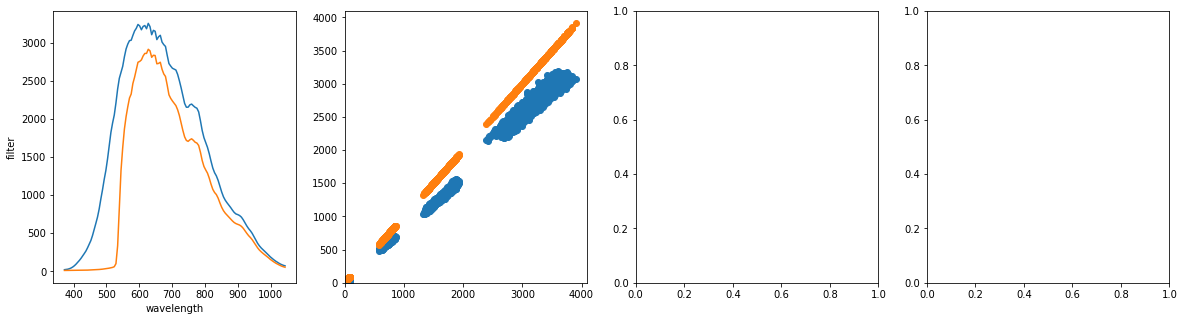

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))

ptfe_mean.plot(ax=ax[0])
filter_mean.plot(ax=ax[0])

wls = {'wavelength': [400, 600, 800, 900], 'method': 'nearest'}
example = reference.sel(**wls)
ax[1].scatter(example['PTFE'], example['filter'])
ax[1].scatter(example['PTFE'], (example['filter'] / example['filter_T']))
ax[1].set_xlim([0, 4096])
ax[1].set_ylim([0, 4096])

#ptfe_mean.plot(ax=ax[2])
#(filter_mean * reference['filter_T'].mean(dim=['x', 'y'])).plot(ax=ax[2])

#reference['filter_T'].mean(dim=['x','y']).plot(ax=ax[3])
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
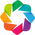

In [35]:
import holoviews as hv
hv.extension('bokeh')

In [46]:
def filter_vs_nofilter(ds, reference):
    
    def plot(tile, wavelength):
        p1 = hv.Scatter(
            reference['PTFE'].sel(wavelength=wavelength),
            ds.sel(wavelength=wavelength).where((ds.tile == tile) & ds.has_filter, drop=True)['dark_corrected_dn']
        )
        p1 = hv.Scatter(
            reference['PTFE'].sel(wavelength=wavelength),
            ds.sel(wavelength=wavelength).where((ds.tile == tile) & ds.has_filter, drop=True)['dark_corrected_dn']
        )
        return p
    
    return plot

hv.DynamicMap(
    filter_vs_nofilter(ds.isel(**filter_roi), reference),
    kdims=[]
)

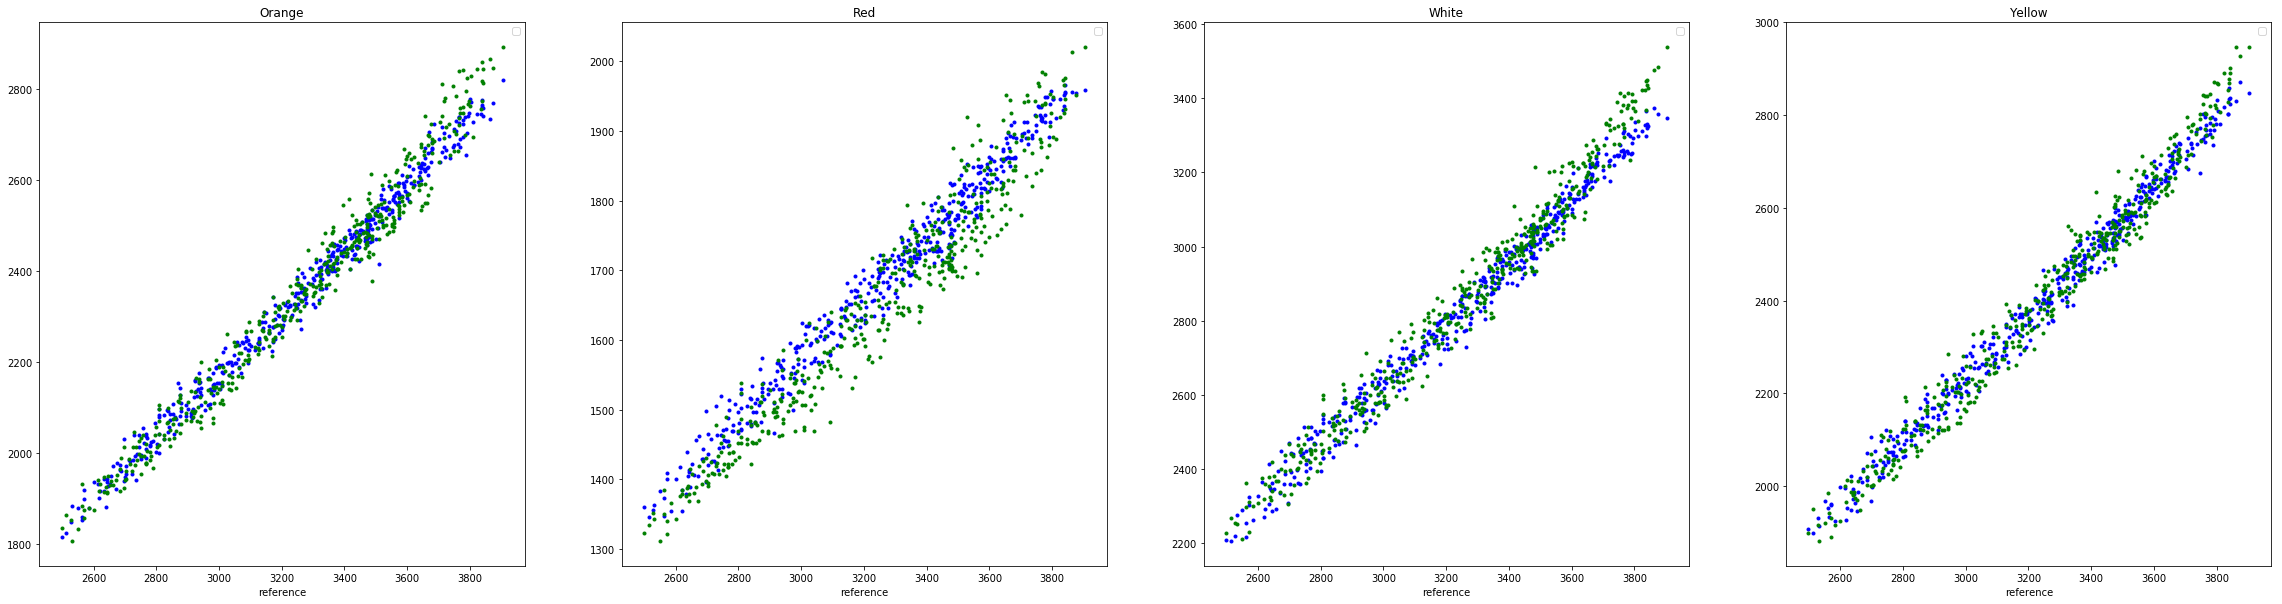

In [40]:
def filterplot(ds, t, wl, ax):
    ds_roi = ds.isel(**filter_roi, wavelength=wl)['dark_corrected_dn'].where(ds.tile==t, drop=True)
    ax.plot(
      reference['PTFE'].isel(wavelength=wl),
      np.squeeze(ds_roi.where(~ds.has_filter, drop=True)),
      'b.',
    )
    ax.plot(
      reference['PTFE'].isel(wavelength=wl),
      np.squeeze(ds_roi.where(ds.has_filter, drop=True) / reference['filter_T'].isel(wavelength=wl)),
      'g.',
    )
    ax.set_title(t)
    ax.set_xlabel('reference')
    ax.legend('')
    
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(40,10))
ax = ax.ravel()
for k, t in enumerate([t for t in np.unique(ds.tile.values) if (t != 'PTFE') and (t != 'dark')]):
    filterplot(ds, t, 50, ax[k])